In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
trecords = pd.read_csv("out/all_pnl_transaction_records.csv")

In [11]:
trec = trecords.dropna(subset=['final price'])

In [12]:
trec

,Unnamed: 0,seed,buy limit,sell limit,final price,message
0,0,293,0,96,398.0,NaN
1,1,842,17,0,404.0,NaN
2,2,16,92,180,400.0,NaN
3,3,1005,179,0,402.0,NaN
4,4,1060,44,22,395.0,NaN
...,...,...,...,...,...,...
272710,272710,759,0,69,399.0,NaN
272711,272711,1420,59,22,397.0,NaN
272712,272712,854,66,0,405.0,NaN
272713,272713,824,0,73,399.0,NaN


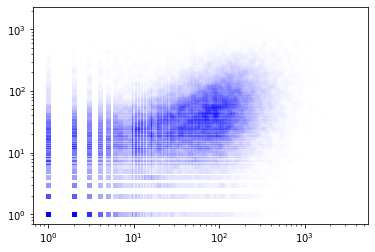

In [30]:
fig = plt.figure()
ax = plt.gca()
ax.plot(trec['buy limit'], trec['sell limit'],  'o', markeredgecolor='none', c='blue', alpha=0.005)
ax.set_yscale('log')
ax.set_xscale('log')

In [50]:
precision = 1

trec['log buy limit'] = np.log1p(trec['buy limit']).round(precision )
trec['log sell limit'] = np.log1p(trec['sell limit']).round(precision)

<ipython-input-50-e3d61a2e02d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trec['log buy limit'] = np.log1p(trec['buy limit']).round(precision )
<ipython-input-50-e3d61a2e02d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trec['log sell limit'] = np.log1p(trec['sell limit']).round(precision)


In [51]:
trec

,Unnamed: 0,seed,buy limit,sell limit,final price,message,log buy limit,log sell limit
0,0,293,0,96,398.0,NaN,0.0,4.6
1,1,842,17,0,404.0,NaN,2.9,0.0
2,2,16,92,180,400.0,NaN,4.5,5.2
3,3,1005,179,0,402.0,NaN,5.2,0.0
4,4,1060,44,22,395.0,NaN,3.8,3.1
...,...,...,...,...,...,...,...,...
272710,272710,759,0,69,399.0,NaN,0.0,4.2
272711,272711,1420,59,22,397.0,NaN,4.1,3.1
272712,272712,854,66,0,405.0,NaN,4.2,0.0
272713,272713,824,0,73,399.0,NaN,0.0,4.3


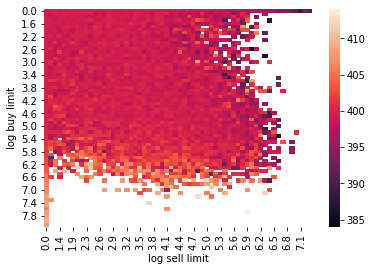

In [52]:
hdata_mean = pd.DataFrame(trec.groupby(['log buy limit','log sell limit']).mean()['final price']).reset_index().pivot(
    index="log buy limit",columns="log sell limit", values="final price")

plt.figure()
ax = sns.heatmap(hdata_mean)

In [49]:
trec.corr()

,Unnamed: 0,seed,buy limit,sell limit,final price,log buy limit,log sell limit
Unnamed: 0,1.000000,0.001389,0.001708,-0.002065,-0.000386,0.001770,-0.001563
seed,0.001389,1.000000,0.000365,-0.000862,0.003777,0.000817,-0.000975
buy limit,0.001708,0.000365,1.000000,-0.099392,0.133288,0.712210,-0.264252
sell limit,-0.002065,-0.000862,-0.099392,1.000000,-0.073834,-0.266764,0.720630
final price,-0.000386,0.003777,0.133288,-0.073834,1.000000,0.086295,-0.065046
log buy limit,0.001770,0.000817,0.712210,-0.266764,0.086295,1.000000,-0.508855
log sell limit,-0.001563,-0.000975,-0.264252,0.720630,-0.065046,-0.508855,1.000000
